In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'SimHei']  # 优先微软雅黑/黑体
plt.rcParams['axes.unicode_minus'] = False  # 修复负号显示
data=pd.read_csv(r"D:\MachineLearningTrain\Export_Output.txt",sep=',',index_col=0,encoding='utf-8-sig')
data

,Join_Count,TARGET_FID,Join_Count_1,TARGET_FID_1,Join_Count_12,TARGET_FID_12,Join_Count_12_13,TARGET_FID_12_13,Join_Count_12_13_14,TARGET_FID_12_13_14,...,MID_Y_12_13,END_X_12_13,END_Y_12_13,PART_COUNT_12_13,PNT_COUNT_12_13,EXT_MIN_X_12_13,EXT_MIN_Y_12_13,EXT_MAX_X_12_13,EXT_MAX_Y_12_13,EucDist_yanx1
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,1,0,1,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021736
2,1,2,0,2,0,2,0,2,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015697
3,1,3,0,3,0,3,0,3,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023818
4,1,4,0,4,0,4,0,4,0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004414
5,1,5,0,5,0,5,0,5,0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,1,392,0,392,0,392,0,392,0,392,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008472
393,1,393,0,393,0,393,1,393,1,393,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001899
394,1,394,0,394,0,394,1,394,1,394,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002800


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, 1 to 396
Columns: 240 entries, Join_Count to EucDist_yanx1
dtypes: float64(192), int64(24), object(24)
memory usage: 745.6+ KB


In [3]:
data.columns

Index(['Join_Count', 'TARGET_FID', 'Join_Count_1', 'TARGET_FID_1',
       'Join_Count_12', 'TARGET_FID_12', 'Join_Count_12_13',
       'TARGET_FID_12_13', 'Join_Count_12_13_14', 'TARGET_FID_12_13_14',
       ...
       'MID_Y_12_13', 'END_X_12_13', 'END_Y_12_13', 'PART_COUNT_12_13',
       'PNT_COUNT_12_13', 'EXT_MIN_X_12_13', 'EXT_MIN_Y_12_13',
       'EXT_MAX_X_12_13', 'EXT_MAX_Y_12_13', 'EucDist_yanx1'],
      dtype='object', length=240)

In [4]:
Y=data.iloc[:,data.columns =="正样本"]
Y

,正样本
OBJECTID,
1,0
2,0
3,0
4,0
5,0
...,...
392,0
393,1
394,1


In [5]:
def data_diagnosis(df):
    # 获取各列数据类型和缺失比例
    missing_ratio = df.isnull().mean().round(4)*100
    dtypes = df.dtypes
    # 检测文本型特征（包含非数字字符的列）
    text_cols = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, str)).any()]
    # 生成诊断报告
    report = pd.DataFrame({'缺失比例%': missing_ratio, '数据类型': dtypes, '是否文本型': [col in text_cols for col in df.columns]})
    return report
print(data_diagnosis(data))

                 缺失比例%     数据类型  是否文本型
Join_Count         0.0    int64  False
TARGET_FID         0.0    int64  False
Join_Count_1       0.0    int64  False
TARGET_FID_1       0.0    int64  False
Join_Count_12      0.0    int64  False
...                ...      ...    ...
EXT_MIN_X_12_13  100.0  float64  False
EXT_MIN_Y_12_13  100.0  float64  False
EXT_MAX_X_12_13  100.0  float64  False
EXT_MAX_Y_12_13  100.0  float64  False
EucDist_yanx1      0.0  float64  False

[240 rows x 3 columns]


In [6]:
import pandas as pd
print(data.isna().sum())

Join_Count           0
TARGET_FID           0
Join_Count_1         0
TARGET_FID_1         0
Join_Count_12        0
                  ... 
EXT_MIN_X_12_13    396
EXT_MIN_Y_12_13    396
EXT_MAX_X_12_13    396
EXT_MAX_Y_12_13    396
EucDist_yanx1        0
Length: 240, dtype: int64


In [7]:
#data.iloc[:,data.columns(missing_ratio) =="正样本"]

In [8]:
# 计算每列缺失值比例
missing_ratio = data.isna().mean()
missing_ratio

Join_Count         0.0
TARGET_FID         0.0
Join_Count_1       0.0
TARGET_FID_1       0.0
Join_Count_12      0.0
                  ... 
EXT_MIN_X_12_13    1.0
EXT_MIN_Y_12_13    1.0
EXT_MAX_X_12_13    1.0
EXT_MAX_Y_12_13    1.0
EucDist_yanx1      0.0
Length: 240, dtype: float64

In [9]:
# 筛选缺失率为 100% 的列
full_missing_cols = missing_ratio[missing_ratio == 1.0].index.tolist()

# 删除这些列
data1 = data.drop(columns=full_missing_cols)
data1

,Join_Count,TARGET_FID,Join_Count_1,TARGET_FID_1,Join_Count_12,TARGET_FID_12,Join_Count_12_13,TARGET_FID_12_13,Join_Count_12_13_14,TARGET_FID_12_13_14,...,POINT_Y_1,pointid_1,grid_code_1,POINT_X_12,POINT_Y_12,pointid_12,grid_code_12,POINT_X_12_13,POINT_Y_12_13,EucDist_yanx1
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,1,0,1,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021736
2,1,2,0,2,0,2,0,2,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015697
3,1,3,0,3,0,3,0,3,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023818
4,1,4,0,4,0,4,0,4,0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004414
5,1,5,0,5,0,5,0,5,0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,1,392,0,392,0,392,0,392,0,392,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008472
393,1,393,0,393,0,393,1,393,1,393,...,27.663333,47652.0,110.224861,116.339444,27.663333,47652.0,9.323457,116.339444,27.663333,0.001899
394,1,394,0,394,0,394,1,394,1,394,...,27.660556,52830.0,291.297363,116.347500,27.660556,52830.0,14.398109,116.347500,27.660556,0.002800


In [10]:
data1.shape

(396, 148)

In [11]:
pd.set_option('display.max_columns', None)  # 显示所有列
pd.set_option('display.max_rows', 100)       # 显示前100行数据
print(data1.head(10))                        # 查看前10行完整数据

          Join_Count  TARGET_FID  Join_Count_1  TARGET_FID_1  Join_Count_12  \
OBJECTID                                                                      
1                  1           1             0             1              0   
2                  1           2             0             2              0   
3                  1           3             0             3              0   
4                  1           4             0             4              0   
5                  1           5             0             5              0   
6                  1           6             0             6              0   
7                  1           7             0             7              0   
8                  1           8             0             8              0   
9                  1           9             0             9              0   
10                 1          10             0            10              0   

          TARGET_FID_12  Join_Count_12_13  TARGET_F

In [12]:
# 获取前 18 列的列名
cols_to_drop = data1.columns[:18].tolist()

# 删除这些列
data2 = data1.drop(columns=cols_to_drop)
data2

,CID,POINT_X,POINT_Y,正样本,灾害体,灾害_1,灾害_12,灾害__13,野外编,室内编,省,市,县,乡镇,地理位,经度,纬度,X,Y,Z,治理情,地下水,地震烈,威胁人,威胁财,灾害等,险情等,监测建,毁坏房,宜黄dem,曲率,坡向,坡度,yihuangjiangshui,LineDen_shp2,LineDen_shp1,NEAR_FID,NEAR_X,NEAR_Y,NEAR_ANGLE,AREA,PERIMETER,CHINA_PC_,CHINA_PC_I,SUBCLASS,SUBCLASS_,RINGS_OK,RINGS_NOK,NEWSUID,DOMSOIL,LANDFORM,SLOPE_MED,RELIEF_MED,ELEV_MED,SMU_MOD,PRID,LITHOLOGY,SQKM,INDEX,ISOCSUID,AREA_GEO,PERIM_GEO,CENTROID_X,CENTROID_Y,INSIDE_X,INSIDE_Y,START_X,START_Y,MID_X,MID_Y,END_X,END_Y,PART_COUNT,PNT_COUNT,EXT_MIN_X,EXT_MIN_Y,EXT_MAX_X,EXT_MAX_Y,AREA_1,PERIMETER_1,CHINA_PC1,CHINA_PC_I_1,SUBCLASS_1,SUBCLASS1,RINGS_OK_1,RINGS_NOK_1,NEWSUID_1,DOMSOIL_1,LANDFORM_1,SLOPE_MED_1,RELIEF_MED_1,ELEV_MED_1,SMU_MOD_1,PRID_1,LITHOLOGY_1,SQKM_1,INDEX_1,ISOCSUID_1,AREA_GEO_1,PERIM_GEO_1,CENTROID_X_1,CENTROID_Y_1,INSIDE_X_1,INSIDE_Y_1,START_X_1,START_Y_1,MID_X_1,MID_Y_1,END_X_1,END_Y_1,PART_COUNT_1,PNT_COUNT_1,EXT_MIN_X_1,EXT_MIN_Y_1,EXT_MAX_X_1,EXT_MAX_Y_1,OBJECTID_1,pointid,grid_code,POINT_X_1,POINT_Y_1,pointid_1,grid_code_1,POINT_X_12,POINT_Y_12,pointid_12,grid_code_12,POINT_X_12_13,POINT_Y_12_13,EucDist_yanx1
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,116.294526,27.412282,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302.364746,7.043690e+09,246.756836,6.125966,1748.583740,0.0,0.0,18,116.294526,27.412282,0.0,0.019315,0.923969,54778.0,54853.0,POLY,5005.0,1,0,198.0,ACh,SM,13.8,154.0,202.0,1808.0,10053.0,SO1,211.723736,1.0,CN 198,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.329580,27.423979,116.260521,27.324700,116.329580,27.423979,1.0,79.0,116.163730,27.288383,116.405390,27.451176,0.019315,0.923969,54778.0,54853.0,POLY,5005.0,1,0,198.0,ACh,SM,13.8,154.0,202.0,1808.0,10053.0,SO1,211.723736,1.0,CN 198,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.329580,27.423979,116.260521,27.324700,116.329580,27.423979,1.0,79.0,116.163730,27.288383,116.405390,27.451176,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021736
2,0.0,116.129084,27.443966,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241.152069,5.595937e+09,66.804558,12.969545,1708.555664,0.0,0.0,9,116.129084,27.443966,0.0,0.303340,14.851678,54185.0,54260.0,POLY,4168.0,11,0,141.0,ACh,SH,27.1,240.0,529.0,1805.0,10033.0,IA1,3339.064421,1.0,CN 141,7.829229e+08,442316.473759,116.207244,27.337458,116.344477,27.453128,116.388210,27.560501,116.229051,27.077035,116.181820,27.069445,1.0,391.0,116.042700,27.038977,116.445070,27.573069,0.303340,14.851678,54185.0,54260.0,POLY,4168.0,11,0,141.0,ACh,SH,27.1,240.0,529.0,1805.0,10033.0,IA1,3339.064421,1.0,CN 141,7.829229e+08,442316.473759,116.207244,27.337458,116.344477,27.453128,116.388210,27.560501,116.229051,27.077035,116.181820,27.069445,1.0,391.0,116.042700,27.038977,116.445070,27.573069,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015697
3,0.0,116.303581,27.391269,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,568.401550,4.131359e+10,103.309563,27.558195,1798.581177,0.0,0.0,18,116.303581,27.391269,0.0,0.019315,0.923969,54778.0,54853.0,POLY,5005.0,1,0,198.0,ACh,SM,13.8,154.0,202.0,1808.0,10053.0,SO1,211.723736,1.0,CN 198,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.329580,27.423979,116.260521,27.324700,116.329580,27.423979,1.0,79.0,116.163730,27.288383,116.405390,27.451176,0.019315,0.923969,54778.0,54853.0,POLY,5005.0,1,0,198.0,ACh,SM,13.8,154.0,202.0,1808.0,10053.0,SO1,211.723736,1.0,CN 198,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.329580,27.423979,116.260521,27.324700,116.329580,27.423979,1.0,79.0,116.163730,27.288383,116.405390,27.451176,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023818
4,0.0,116.243388,27.505975,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [13]:
columns_to_drop = data2.columns[4:29]
columns_to_drop

Index(['灾害体', '灾害_1', '灾害_12', '灾害__13', '野外编', '室内编', '省', '市', '县', '乡镇',
       '地理位', '经度', '纬度', 'X', 'Y', 'Z', '治理情', '地下水', '地震烈', '威胁人', '威胁财',
       '灾害等', '险情等', '监测建', '毁坏房'],
      dtype='object')

In [14]:
data3 = data2.drop(columns=columns_to_drop)

In [15]:
data3

,CID,POINT_X,POINT_Y,正样本,宜黄dem,曲率,坡向,坡度,yihuangjiangshui,LineDen_shp2,LineDen_shp1,NEAR_FID,NEAR_X,NEAR_Y,NEAR_ANGLE,AREA,PERIMETER,CHINA_PC_,CHINA_PC_I,SUBCLASS,SUBCLASS_,RINGS_OK,RINGS_NOK,NEWSUID,DOMSOIL,LANDFORM,SLOPE_MED,RELIEF_MED,ELEV_MED,SMU_MOD,PRID,LITHOLOGY,SQKM,INDEX,ISOCSUID,AREA_GEO,PERIM_GEO,CENTROID_X,CENTROID_Y,INSIDE_X,INSIDE_Y,START_X,START_Y,MID_X,MID_Y,END_X,END_Y,PART_COUNT,PNT_COUNT,EXT_MIN_X,EXT_MIN_Y,EXT_MAX_X,EXT_MAX_Y,AREA_1,PERIMETER_1,CHINA_PC1,CHINA_PC_I_1,SUBCLASS_1,SUBCLASS1,RINGS_OK_1,RINGS_NOK_1,NEWSUID_1,DOMSOIL_1,LANDFORM_1,SLOPE_MED_1,RELIEF_MED_1,ELEV_MED_1,SMU_MOD_1,PRID_1,LITHOLOGY_1,SQKM_1,INDEX_1,ISOCSUID_1,AREA_GEO_1,PERIM_GEO_1,CENTROID_X_1,CENTROID_Y_1,INSIDE_X_1,INSIDE_Y_1,START_X_1,START_Y_1,MID_X_1,MID_Y_1,END_X_1,END_Y_1,PART_COUNT_1,PNT_COUNT_1,EXT_MIN_X_1,EXT_MIN_Y_1,EXT_MAX_X_1,EXT_MAX_Y_1,OBJECTID_1,pointid,grid_code,POINT_X_1,POINT_Y_1,pointid_1,grid_code_1,POINT_X_12,POINT_Y_12,pointid_12,grid_code_12,POINT_X_12_13,POINT_Y_12_13,EucDist_yanx1
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,116.294526,27.412282,0,302.364746,7.043690e+09,246.756836,6.125966,1748.583740,0.0,0.0,18,116.294526,27.412282,0.0,0.019315,0.923969,54778.0,54853.0,POLY,5005.0,1,0,198.0,ACh,SM,13.8,154.0,202.0,1808.0,10053.0,SO1,211.723736,1.0,CN 198,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.329580,27.423979,116.260521,27.324700,116.329580,27.423979,1.0,79.0,116.163730,27.288383,116.405390,27.451176,0.019315,0.923969,54778.0,54853.0,POLY,5005.0,1,0,198.0,ACh,SM,13.8,154.0,202.0,1808.0,10053.0,SO1,211.723736,1.0,CN 198,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.329580,27.423979,116.260521,27.324700,116.329580,27.423979,1.0,79.0,116.163730,27.288383,116.405390,27.451176,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021736
2,0.0,116.129084,27.443966,0,241.152069,5.595937e+09,66.804558,12.969545,1708.555664,0.0,0.0,9,116.129084,27.443966,0.0,0.303340,14.851678,54185.0,54260.0,POLY,4168.0,11,0,141.0,ACh,SH,27.1,240.0,529.0,1805.0,10033.0,IA1,3339.064421,1.0,CN 141,7.829229e+08,442316.473759,116.207244,27.337458,116.344477,27.453128,116.388210,27.560501,116.229051,27.077035,116.181820,27.069445,1.0,391.0,116.042700,27.038977,116.445070,27.573069,0.303340,14.851678,54185.0,54260.0,POLY,4168.0,11,0,141.0,ACh,SH,27.1,240.0,529.0,1805.0,10033.0,IA1,3339.064421,1.0,CN 141,7.829229e+08,442316.473759,116.207244,27.337458,116.344477,27.453128,116.388210,27.560501,116.229051,27.077035,116.181820,27.069445,1.0,391.0,116.042700,27.038977,116.445070,27.573069,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015697
3,0.0,116.303581,27.391269,0,568.401550,4.131359e+10,103.309563,27.558195,1798.581177,0.0,0.0,18,116.303581,27.391269,0.0,0.019315,0.923969,54778.0,54853.0,POLY,5005.0,1,0,198.0,ACh,SM,13.8,154.0,202.0,1808.0,10053.0,SO1,211.723736,1.0,CN 198,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.329580,27.423979,116.260521,27.324700,116.329580,27.423979,1.0,79.0,116.163730,27.288383,116.405390,27.451176,0.019315,0.923969,54778.0,54853.0,POLY,5005.0,1,0,198.0,ACh,SM,13.8,154.0,202.0,1808.0,10053.0,SO1,211.723736,1.0,CN 198,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.329580,27.423979,116.260521,27.324700,116.329580,27.423979,1.0,79.0,116.163730,27.288383,116.405390,27.451176,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023818
4,0.0,116.243388,27.505975,0,128.348846,5.466247e+09,178.442246,4.723942,1683.546631,0.0,0.0,9,116.243388,27.505975,0.0,0.303340,14.851678,54185.0,54260.0,POLY,4168.0,11,0,141.0,ACh,SH,27.1,240.0,529.0,1805.0,10033.0,IA1,3339.064421,1.0,CN 141,7.829229e+08,442316.473759,116.207244,27.337458,116.344477,27.453128,116.388210,27.560501,116.229051,27.077035,116.181820,27.069445,1.0,391.0,116.042700,27.038977,116.445070,27.573069,0.303340,14.851678,54185.0,54260.0,POLY,4168.0,11,0,141.0,ACh,SH,27.1,24

In [16]:
columns_to_drop = data3.columns[92:104]
columns_to_drop

Index(['pointid', 'grid_code', 'POINT_X_1', 'POINT_Y_1', 'pointid_1',
       'grid_code_1', 'POINT_X_12', 'POINT_Y_12', 'pointid_12', 'grid_code_12',
       'POINT_X_12_13', 'POINT_Y_12_13'],
      dtype='object')

In [17]:
data4 = data3.drop(columns=columns_to_drop)

In [18]:
data4.head()

,CID,POINT_X,POINT_Y,正样本,宜黄dem,曲率,坡向,坡度,yihuangjiangshui,LineDen_shp2,LineDen_shp1,NEAR_FID,NEAR_X,NEAR_Y,NEAR_ANGLE,AREA,PERIMETER,CHINA_PC_,CHINA_PC_I,SUBCLASS,SUBCLASS_,RINGS_OK,RINGS_NOK,NEWSUID,DOMSOIL,LANDFORM,SLOPE_MED,RELIEF_MED,ELEV_MED,SMU_MOD,PRID,LITHOLOGY,SQKM,INDEX,ISOCSUID,AREA_GEO,PERIM_GEO,CENTROID_X,CENTROID_Y,INSIDE_X,INSIDE_Y,START_X,START_Y,MID_X,MID_Y,END_X,END_Y,PART_COUNT,PNT_COUNT,EXT_MIN_X,EXT_MIN_Y,EXT_MAX_X,EXT_MAX_Y,AREA_1,PERIMETER_1,CHINA_PC1,CHINA_PC_I_1,SUBCLASS_1,SUBCLASS1,RINGS_OK_1,RINGS_NOK_1,NEWSUID_1,DOMSOIL_1,LANDFORM_1,SLOPE_MED_1,RELIEF_MED_1,ELEV_MED_1,SMU_MOD_1,PRID_1,LITHOLOGY_1,SQKM_1,INDEX_1,ISOCSUID_1,AREA_GEO_1,PERIM_GEO_1,CENTROID_X_1,CENTROID_Y_1,INSIDE_X_1,INSIDE_Y_1,START_X_1,START_Y_1,MID_X_1,MID_Y_1,END_X_1,END_Y_1,PART_COUNT_1,PNT_COUNT_1,EXT_MIN_X_1,EXT_MIN_Y_1,EXT_MAX_X_1,EXT_MAX_Y_1,OBJECTID_1,EucDist_yanx1
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,116.294526,27.412282,0,302.364746,7.043690e+09,246.756836,6.125966,1748.583740,0.0,0.0,18,116.294526,27.412282,0.0,0.019315,0.923969,54778.0,54853.0,POLY,5005.0,1,0,198.0,ACh,SM,13.8,154.0,202.0,1808.0,10053.0,SO1,211.723736,1.0,CN 198,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.32958,27.423979,116.260521,27.324700,116.32958,27.423979,1.0,79.0,116.16373,27.288383,116.40539,27.451176,0.019315,0.923969,54778.0,54853.0,POLY,5005.0,1,0,198.0,ACh,SM,13.8,154.0,202.0,1808.0,10053.0,SO1,211.723736,1.0,CN 198,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.32958,27.423979,116.260521,27.324700,116.32958,27.423979,1.0,79.0,116.16373,27.288383,116.40539,27.451176,1.0,0.021736
2,0.0,116.129084,27.443966,0,241.152069,5.595937e+09,66.804558,12.969545,1708.555664,0.0,0.0,9,116.129084,27.443966,0.0,0.303340,14.851678,54185.0,54260.0,POLY,4168.0,11,0,141.0,ACh,SH,27.1,240.0,529.0,1805.0,10033.0,IA1,3339.064421,1.0,CN 141,7.829229e+08,442316.473759,116.207244,27.337458,116.344477,27.453128,116.38821,27.560501,116.229051,27.077035,116.18182,27.069445,1.0,391.0,116.04270,27.038977,116.44507,27.573069,0.303340,14.851678,54185.0,54260.0,POLY,4168.0,11,0,141.0,ACh,SH,27.1,240.0,529.0,1805.0,10033.0,IA1,3339.064421,1.0,CN 141,7.829229e+08,442316.473759,116.207244,27.337458,116.344477,27.453128,116.38821,27.560501,116.229051,27.077035,116.18182,27.069445,1.0,391.0,116.04270,27.038977,116.44507,27.573069,2.0,0.015697
3,0.0,116.303581,27.391269,0,568.401550,4.131359e+10,103.309563,27.558195,1798.581177,0.0,0.0,18,116.303581,27.391269,0.0,0.019315,0.923969,54778.0,54853.0,POLY,5005.0,1,0,198.0,ACh,SM,13.8,154.0,202.0,1808.0,10053.0,SO1,211.723736,1.0,CN 198,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.32958,27.423979,116.260521,27.324700,116.32958,27.423979,1.0,79.0,116.16373,27.288383,116.40539,27.451176,0.019315,0.923969,54778.0,54853.0,POLY,5005.0,1,0,198.0,ACh,SM,13.8,154.0,202.0,1808.0,10053.0,SO1,211.723736,1.0,CN 198,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.32958,27.423979,116.260521,27.324700,116.32958,27.423979,1.0,79.0,116.16373,27.288383,116.40539,27.451176,3.0,0.023818
4,0.0,116.243388,27.505975,0,128.348846,5.466247e+09,178.442246,4.723942,1683.546631,0.0,0.0,9,116.243388,27.505975,0.0,0.303340,14.851678,54185.0,54260.0,POLY,4168.0,11,0,141.0,ACh,SH,27.1,240.0,529.0,1805.0,10033.0,IA1,3339.064421,1.0,CN 141,7.829229e+08,442316.473759,116.207244,27.337458,116.344477,27.453128,116.38821,27.560501,116.229051,27.077035,116.18182,27.069445,1.0,391.0,116.04270,27.038977,116.44507,27.573069,0.303340,14.851678,54185.0,54260.0,POLY,4168.0,11,0,141.0,ACh,SH,27.1,240.0,529.0,1805.0,10033.0,IA1,3339.064421,1.0,CN 141,7.829229e+08,442316.473759,116.207244,27.337458,116.344477,27.453128,116.38821,27.560501,116.229051,27.077035,116.18182,27.069445,1.0,391.0,116.04270,27.038977,116.44507,27.573069,4.0,0.004414
5,0.0,116.253666,27.408413,0,418.600800,5.168396e+09,216.489136,8.408228,

In [19]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, 1 to 396
Data columns (total 93 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CID               198 non-null    float64
 1   POINT_X           396 non-null    float64
 2   POINT_Y           396 non-null    float64
 3   正样本               396 non-null    int64  
 4   宜黄dem             394 non-null    float64
 5   曲率                394 non-null    float64
 6   坡向                391 non-null    float64
 7   坡度                391 non-null    float64
 8   yihuangjiangshui  371 non-null    float64
 9   LineDen_shp2      149 non-null    float64
 10  LineDen_shp1      149 non-null    float64
 11  NEAR_FID          396 non-null    int64  
 12  NEAR_X            396 non-null    float64
 13  NEAR_Y            396 non-null    float64
 14  NEAR_ANGLE        396 non-null    float64
 15  AREA              396 non-null    float64
 16  PERIMETER         396 non-null    float64
 17  CH

In [20]:
for i in range(4,11):
    data4.columns[i]
    data4[data4.columns[i]]=data4[data4.columns[i]].fillna(data[data4.columns[i]].mean())#均值填补
    print(data4.columns[i])

宜黄dem
曲率
坡向
坡度
yihuangjiangshui
LineDen_shp2
LineDen_shp1


In [21]:
data4["CID"]=data4["CID"].fillna(data4["CID"].mean())#均值填补

In [22]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, 1 to 396
Data columns (total 93 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CID               396 non-null    float64
 1   POINT_X           396 non-null    float64
 2   POINT_Y           396 non-null    float64
 3   正样本               396 non-null    int64  
 4   宜黄dem             396 non-null    float64
 5   曲率                396 non-null    float64
 6   坡向                396 non-null    float64
 7   坡度                396 non-null    float64
 8   yihuangjiangshui  396 non-null    float64
 9   LineDen_shp2      396 non-null    float64
 10  LineDen_shp1      396 non-null    float64
 11  NEAR_FID          396 non-null    int64  
 12  NEAR_X            396 non-null    float64
 13  NEAR_Y            396 non-null    float64
 14  NEAR_ANGLE        396 non-null    float64
 15  AREA              396 non-null    float64
 16  PERIMETER         396 non-null    float64
 17  CH

In [23]:
data4.DOMSOIL

OBJECTID
1      ACh
2      ACh
3      ACh
4      ACh
5      ACh
      ... 
392    ACh
393    ATc
394    ATc
395    ACh
396    ACh
Name: DOMSOIL, Length: 396, dtype: object

In [24]:
#处理分类型特征（文字——编码）
#导入标签提取器
from sklearn.preprocessing import LabelEncoder#标签专用
le=LabelEncoder()#实例化
label=le.fit_transform(data4["DOMSOIL"])
le.classes_#查看标签中类别

array(['ACh', 'ACu', 'ALh', 'ATc'], dtype=object)

In [25]:
#简写
data4["DOMSOIL"]=LabelEncoder().fit_transform(data4["DOMSOIL"])
data4["SUBCLASS"]=LabelEncoder().fit_transform(data4["SUBCLASS"])
data4["LITHOLOGY"]=LabelEncoder().fit_transform(data4["LITHOLOGY"])
data4["SUBCLASS_1"]=LabelEncoder().fit_transform(data4["SUBCLASS_1"])

In [26]:
data4.head()

,CID,POINT_X,POINT_Y,正样本,宜黄dem,曲率,坡向,坡度,yihuangjiangshui,LineDen_shp2,LineDen_shp1,NEAR_FID,NEAR_X,NEAR_Y,NEAR_ANGLE,AREA,PERIMETER,CHINA_PC_,CHINA_PC_I,SUBCLASS,SUBCLASS_,RINGS_OK,RINGS_NOK,NEWSUID,DOMSOIL,LANDFORM,SLOPE_MED,RELIEF_MED,ELEV_MED,SMU_MOD,PRID,LITHOLOGY,SQKM,INDEX,ISOCSUID,AREA_GEO,PERIM_GEO,CENTROID_X,CENTROID_Y,INSIDE_X,INSIDE_Y,START_X,START_Y,MID_X,MID_Y,END_X,END_Y,PART_COUNT,PNT_COUNT,EXT_MIN_X,EXT_MIN_Y,EXT_MAX_X,EXT_MAX_Y,AREA_1,PERIMETER_1,CHINA_PC1,CHINA_PC_I_1,SUBCLASS_1,SUBCLASS1,RINGS_OK_1,RINGS_NOK_1,NEWSUID_1,DOMSOIL_1,LANDFORM_1,SLOPE_MED_1,RELIEF_MED_1,ELEV_MED_1,SMU_MOD_1,PRID_1,LITHOLOGY_1,SQKM_1,INDEX_1,ISOCSUID_1,AREA_GEO_1,PERIM_GEO_1,CENTROID_X_1,CENTROID_Y_1,INSIDE_X_1,INSIDE_Y_1,START_X_1,START_Y_1,MID_X_1,MID_Y_1,END_X_1,END_Y_1,PART_COUNT_1,PNT_COUNT_1,EXT_MIN_X_1,EXT_MIN_Y_1,EXT_MAX_X_1,EXT_MAX_Y_1,OBJECTID_1,EucDist_yanx1
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,116.294526,27.412282,0,302.364746,7.043690e+09,246.756836,6.125966,1748.583740,0.0,0.0,18,116.294526,27.412282,0.0,0.019315,0.923969,54778.0,54853.0,0,5005.0,1,0,198.0,0,SM,13.8,154.0,202.0,1808.0,10053.0,4,211.723736,1.0,CN 198,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.32958,27.423979,116.260521,27.324700,116.32958,27.423979,1.0,79.0,116.16373,27.288383,116.40539,27.451176,0.019315,0.923969,54778.0,54853.0,0,5005.0,1,0,198.0,ACh,SM,13.8,154.0,202.0,1808.0,10053.0,SO1,211.723736,1.0,CN 198,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.32958,27.423979,116.260521,27.324700,116.32958,27.423979,1.0,79.0,116.16373,27.288383,116.40539,27.451176,1.0,0.021736
2,0.0,116.129084,27.443966,0,241.152069,5.595937e+09,66.804558,12.969545,1708.555664,0.0,0.0,9,116.129084,27.443966,0.0,0.303340,14.851678,54185.0,54260.0,0,4168.0,11,0,141.0,0,SH,27.1,240.0,529.0,1805.0,10033.0,0,3339.064421,1.0,CN 141,7.829229e+08,442316.473759,116.207244,27.337458,116.344477,27.453128,116.38821,27.560501,116.229051,27.077035,116.18182,27.069445,1.0,391.0,116.04270,27.038977,116.44507,27.573069,0.303340,14.851678,54185.0,54260.0,0,4168.0,11,0,141.0,ACh,SH,27.1,240.0,529.0,1805.0,10033.0,IA1,3339.064421,1.0,CN 141,7.829229e+08,442316.473759,116.207244,27.337458,116.344477,27.453128,116.38821,27.560501,116.229051,27.077035,116.18182,27.069445,1.0,391.0,116.04270,27.038977,116.44507,27.573069,2.0,0.015697
3,0.0,116.303581,27.391269,0,568.401550,4.131359e+10,103.309563,27.558195,1798.581177,0.0,0.0,18,116.303581,27.391269,0.0,0.019315,0.923969,54778.0,54853.0,0,5005.0,1,0,198.0,0,SM,13.8,154.0,202.0,1808.0,10053.0,4,211.723736,1.0,CN 198,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.32958,27.423979,116.260521,27.324700,116.32958,27.423979,1.0,79.0,116.16373,27.288383,116.40539,27.451176,0.019315,0.923969,54778.0,54853.0,0,5005.0,1,0,198.0,ACh,SM,13.8,154.0,202.0,1808.0,10053.0,SO1,211.723736,1.0,CN 198,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.32958,27.423979,116.260521,27.324700,116.32958,27.423979,1.0,79.0,116.16373,27.288383,116.40539,27.451176,3.0,0.023818
4,0.0,116.243388,27.505975,0,128.348846,5.466247e+09,178.442246,4.723942,1683.546631,0.0,0.0,9,116.243388,27.505975,0.0,0.303340,14.851678,54185.0,54260.0,0,4168.0,11,0,141.0,0,SH,27.1,240.0,529.0,1805.0,10033.0,0,3339.064421,1.0,CN 141,7.829229e+08,442316.473759,116.207244,27.337458,116.344477,27.453128,116.38821,27.560501,116.229051,27.077035,116.18182,27.069445,1.0,391.0,116.04270,27.038977,116.44507,27.573069,0.303340,14.851678,54185.0,54260.0,0,4168.0,11,0,141.0,ACh,SH,27.1,240.0,529.0,1805.0,10033.0,IA1,3339.064421,1.0,CN 141,7.829229e+08,442316.473759,116.207244,27.337458,116.344477,27.453128,116.38821,27.560501,116.229051,27.077035,116.18182,27.069445,1.0,391.0,116.04270,27.038977,116.44507,27.573069,4.0,0.004414
5,0.0,116.253666,27.408413,0,418.600800,5.168396e+09,216.489136,8.408228,1740.913208,0.0,0.0,18,116.253666,27.408

In [27]:
columns_to_drop = data2.columns[84:117]
columns_to_drop

Index(['RINGS_OK_1', 'RINGS_NOK_1', 'NEWSUID_1', 'DOMSOIL_1', 'LANDFORM_1',
       'SLOPE_MED_1', 'RELIEF_MED_1', 'ELEV_MED_1', 'SMU_MOD_1', 'PRID_1',
       'LITHOLOGY_1', 'SQKM_1', 'INDEX_1', 'ISOCSUID_1', 'AREA_GEO_1',
       'PERIM_GEO_1', 'CENTROID_X_1', 'CENTROID_Y_1', 'INSIDE_X_1',
       'INSIDE_Y_1', 'START_X_1', 'START_Y_1', 'MID_X_1', 'MID_Y_1', 'END_X_1',
       'END_Y_1', 'PART_COUNT_1', 'PNT_COUNT_1', 'EXT_MIN_X_1', 'EXT_MIN_Y_1',
       'EXT_MAX_X_1', 'EXT_MAX_Y_1', 'OBJECTID_1'],
      dtype='object')

In [28]:
data4 = data4.drop(columns=columns_to_drop)

#哑变量操作

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# 定义需要哑变量化的列名列表
cat_cols = ["DOMSOIL", "SUBCLASS", "LITHOLOGY","SUBCLASS_1","ISOCSUID","LANDFORM"]  # 根据实际列名修改

# 创建预处理管道
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_cols)
    ],
    remainder='passthrough'  # 保留其他列（如数值型）
)

# 执行转换并获取列名
X_transformed = preprocessor.fit_transform(data4)
feature_names = preprocessor.get_feature_names_out(input_features=data4.columns)

# 直接生成带新列名的DataFrame
newdata = pd.DataFrame(X_transformed, columns=feature_names)
newdata.columns = [col.split("__")[-1] for col in feature_names]

In [30]:
newdata

,DOMSOIL_1,DOMSOIL_2,DOMSOIL_3,LITHOLOGY_1,LITHOLOGY_2,LITHOLOGY_3,LITHOLOGY_4,LITHOLOGY_5,ISOCSUID_CN 118,ISOCSUID_CN 119,ISOCSUID_CN 128,ISOCSUID_CN 139,ISOCSUID_CN 141,ISOCSUID_CN 165,ISOCSUID_CN 198,ISOCSUID_CN 312,ISOCSUID_CN 526,ISOCSUID_CN 535,ISOCSUID_CN 766,ISOCSUID_CN 774,LANDFORM_SH,LANDFORM_SM,LANDFORM_TM,CID,POINT_X,POINT_Y,正样本,宜黄dem,曲率,坡向,坡度,yihuangjiangshui,LineDen_shp2,LineDen_shp1,NEAR_FID,NEAR_X,NEAR_Y,NEAR_ANGLE,AREA,PERIMETER,CHINA_PC_,CHINA_PC_I,SUBCLASS_,RINGS_OK,RINGS_NOK,NEWSUID,SLOPE_MED,RELIEF_MED,ELEV_MED,SMU_MOD,PRID,SQKM,INDEX,AREA_GEO,PERIM_GEO,CENTROID_X,CENTROID_Y,INSIDE_X,INSIDE_Y,START_X,START_Y,MID_X,MID_Y,END_X,END_Y,PART_COUNT,PNT_COUNT,EXT_MIN_X,EXT_MIN_Y,EXT_MAX_X,EXT_MAX_Y,AREA_1,PERIMETER_1,CHINA_PC1,CHINA_PC_I_1,SUBCLASS1,EucDist_yanx1
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,116.294526,27.412282,0.0,302.364746,7.043690e+09,246.756836,6.125966,1748.583740,0.000000,0.000000,18.0,116.294526,27.412282,0.0,0.019315,0.923969,54778.0,54853.0,5005.0,1.0,0.0,198.0,13.8,154.0,202.0,1808.0,10053.0,211.723736,1.0,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.329580,27.423979,116.260521,27.324700,116.329580,27.423979,1.0,79.0,116.163730,27.288383,116.405390,27.451176,0.019315,0.923969,54778.0,54853.0,5005.0,0.021736
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,116.129084,27.443966,0.0,241.152069,5.595937e+09,66.804558,12.969545,1708.555664,0.000000,0.000000,9.0,116.129084,27.443966,0.0,0.303340,14.851678,54185.0,54260.0,4168.0,11.0,0.0,141.0,27.1,240.0,529.0,1805.0,10033.0,3339.064421,1.0,7.829229e+08,442316.473759,116.207244,27.337458,116.344477,27.453128,116.388210,27.560501,116.229051,27.077035,116.181820,27.069445,1.0,391.0,116.042700,27.038977,116.445070,27.573069,0.303340,14.851678,54185.0,54260.0,4168.0,0.015697
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,116.303581,27.391269,0.0,568.401550,4.131359e+10,103.309563,27.558195,1798.581177,0.000000,0.000000,18.0,116.303581,27.391269,0.0,0.019315,0.923969,54778.0,54853.0,5005.0,1.0,0.0,198.0,13.8,154.0,202.0,1808.0,10053.0,211.723736,1.0,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.329580,27.423979,116.260521,27.324700,116.329580,27.423979,1.0,79.0,116.163730,27.288383,116.405390,27.451176,0.019315,0.923969,54778.0,54853.0,5005.0,0.023818
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,116.243388,27.505975,0.0,128.348846,5.466247e+09,178.442246,4.723942,1683.546631,0.000000,0.000000,9.0,116.243388,27.505975,0.0,0.303340,14.851678,54185.0,54260.0,4168.0,11.0,0.0,141.0,27.1,240.0,529.0,1805.0,10033.0,3339.064421,1.0,7.829229e+08,442316.473759,116.207244,27.337458,116.344477,27.453128,116.388210,27.560501,116.229051,27.077035,116.181820,27.069445,1.0,391.0,116.042700,27.038977,116.445070,27.573069,0.303340,14.851678,54185.0,54260.0,4168.0,0.004414
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,116.253666,27.408413,0.0,418.600800,5.168396e+09,216.489136,8.408228,1740.913208,0.000000,0.000000,18.0,116.253666,27.408413,0.0,0.019315,0.923969,54778.0,54853.0,5005.0,1.0,0.0,198.0,13.8,154.0,202.0,1808.0,10053.0,211.723736,1.0,2.117251e+08,96676.052607,116.279122,27.376747,116.279122,27.376747,116.329580,27.423979,116.260521,27.324700,116.329580,27.423979,1.0,79.0,116.163730,27.288383,116.405390,27.451176,0.019315,0.923969,54778.0,54853.0,5005.0,0.033692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

标准化

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler #
scaler=MinMaxScaler()#实例化
for i in range(27,77):
    newdata.columns[i]
    print(newdata.columns[i])
    newdata[newdata.columns[i]] = scaler.fit_transform(newdata[newdata.columns[i]].values.reshape(-1,1))

宜黄dem
曲率
坡向
坡度
yihuangjiangshui
LineDen_shp2
LineDen_shp1
NEAR_FID
NEAR_X
NEAR_Y
NEAR_ANGLE
AREA
PERIMETER
CHINA_PC_
CHINA_PC_I
SUBCLASS_
RINGS_OK
RINGS_NOK
NEWSUID
SLOPE_MED
RELIEF_MED
ELEV_MED
SMU_MOD
PRID
SQKM
INDEX
AREA_GEO
PERIM_GEO
CENTROID_X
CENTROID_Y
INSIDE_X
INSIDE_Y
START_X
START_Y
MID_X
MID_Y
END_X
END_Y
PART_COUNT
PNT_COUNT
EXT_MIN_X
EXT_MIN_Y
EXT_MAX_X
EXT_MAX_Y
AREA_1
PERIMETER_1
CHINA_PC1
CHINA_PC_I_1
SUBCLASS1
EucDist_yanx1


In [32]:
newdata

,DOMSOIL_1,DOMSOIL_2,DOMSOIL_3,LITHOLOGY_1,LITHOLOGY_2,LITHOLOGY_3,LITHOLOGY_4,LITHOLOGY_5,ISOCSUID_CN 118,ISOCSUID_CN 119,ISOCSUID_CN 128,ISOCSUID_CN 139,ISOCSUID_CN 141,ISOCSUID_CN 165,ISOCSUID_CN 198,ISOCSUID_CN 312,ISOCSUID_CN 526,ISOCSUID_CN 535,ISOCSUID_CN 766,ISOCSUID_CN 774,LANDFORM_SH,LANDFORM_SM,LANDFORM_TM,CID,POINT_X,POINT_Y,正样本,宜黄dem,曲率,坡向,坡度,yihuangjiangshui,LineDen_shp2,LineDen_shp1,NEAR_FID,NEAR_X,NEAR_Y,NEAR_ANGLE,AREA,PERIMETER,CHINA_PC_,CHINA_PC_I,SUBCLASS_,RINGS_OK,RINGS_NOK,NEWSUID,SLOPE_MED,RELIEF_MED,ELEV_MED,SMU_MOD,PRID,SQKM,INDEX,AREA_GEO,PERIM_GEO,CENTROID_X,CENTROID_Y,INSIDE_X,INSIDE_Y,START_X,START_Y,MID_X,MID_Y,END_X,END_Y,PART_COUNT,PNT_COUNT,EXT_MIN_X,EXT_MIN_Y,EXT_MAX_X,EXT_MAX_Y,AREA_1,PERIMETER_1,CHINA_PC1,CHINA_PC_I_1,SUBCLASS1,EucDist_yanx1
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,116.294526,27.412282,0.0,0.230893,0.538043,0.693200,0.126023,0.270685,0.000000,0.000000,0.695652,0.588500,0.558764,0.0,0.059464,0.050751,0.661743,0.661743,0.131250,0.0,0.0,0.078585,0.333333,0.369697,0.136905,0.853556,0.001195,0.059223,0.0,0.269925,0.212476,0.528870,0.324916,0.541750,0.422332,0.642092,0.409001,0.501546,0.403810,0.627318,0.559917,0.0,0.183246,0.319953,0.390809,0.800592,0.384202,0.059464,0.050751,0.661743,0.661743,0.131250,0.516201
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,116.129084,27.443966,0.0,0.174464,0.520588,0.187670,0.285992,0.136139,0.000000,0.000000,0.304348,0.198744,0.609142,0.0,1.000000,1.000000,0.223781,0.223781,0.074623,1.0,0.0,0.022593,0.755556,0.630303,0.526190,0.841004,0.000199,1.000000,0.0,1.000000,1.000000,0.348331,0.238473,0.701421,0.566135,0.783378,0.704957,0.420609,0.000000,0.256548,0.000000,0.0,1.000000,0.031867,0.000000,0.903295,0.674734,1.000000,1.000000,0.223781,0.223781,0.074623,0.371207
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,116.303581,27.391269,0.0,0.476140,0.951218,0.290221,0.627002,0.438742,0.000000,0.000000,0.695652,0.609832,0.525352,0.0,0.059464,0.050751,0.661743,0.661743,0.131250,0.0,0.0,0.078585,0.333333,0.369697,0.136905,0.853556,0.001195,0.059223,0.0,0.269925,0.212476,0.528870,0.324916,0.541750,0.422332,0.642092,0.409001,0.501546,0.403810,0.627318,0.559917,0.0,0.183246,0.319953,0.390809,0.800592,0.384202,0.059464,0.050751,0.661743,0.661743,0.131250,0.566209
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,116.243388,27.505975,0.0,0.070476,0.519024,0.501288,0.093251,0.052076,0.000000,0.000000,0.304348,0.468028,0.707740,0.0,1.000000,1.000000,0.223781,0.223781,0.074623,1.0,0.0,0.022593,0.755556,0.630303,0.526190,0.841004,0.000199,1.000000,0.0,1.000000,1.000000,0.348331,0.238473,0.701421,0.566135,0.783378,0.704957,0.420609,0.000000,0.256548,0.000000,0.0,1.000000,0.031867,0.000000,0.903295,0.674734,1.000000,1.000000,0.223781,0.223781,0.074623,0.100298
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,116.253666,27.408413,0.0,0.338046,0.515433,0.608171,0.179371,0.244902,0.000000,0.000000,0.695652,0.492241,0.552612,0.0,0.059464,0.050751,0.661743,0.661743,0.131250,0.0,0.0,0.078585,0.333333,0.369697,0.136905,0.853556,0.001195,0.059223,0.0,0.269925,0.212476,0.528870,0.324916,0.541750,0.422332,0.642092,0.409001,0.501546,0.403810,0.627318,0.559917,0.0,0.183246,0.319953,0.390809,0.800592,0.384202,0.059464,0.050751,0.661743,0.661743,0.131250,0.803290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,116.403142,27.634599,0.0,0.067934,0.226545,0.736634,0.226428

In [33]:
# 归一化到 [0,1]（适用大部分模型）
X = newdata.loc[:, newdata.columns != "正样本"].copy()  # 创建独立副本
X["POINT_X"] = (X["POINT_X"] + 180) / 360  # 经度范围 [-180,180] → [0,1]
X["POINT_Y"] = (X["POINT_Y"] + 90) / 180   # 纬度范围 [-90,90] → [0,1]
X

,DOMSOIL_1,DOMSOIL_2,DOMSOIL_3,LITHOLOGY_1,LITHOLOGY_2,LITHOLOGY_3,LITHOLOGY_4,LITHOLOGY_5,ISOCSUID_CN 118,ISOCSUID_CN 119,ISOCSUID_CN 128,ISOCSUID_CN 139,ISOCSUID_CN 141,ISOCSUID_CN 165,ISOCSUID_CN 198,ISOCSUID_CN 312,ISOCSUID_CN 526,ISOCSUID_CN 535,ISOCSUID_CN 766,ISOCSUID_CN 774,LANDFORM_SH,LANDFORM_SM,LANDFORM_TM,CID,POINT_X,POINT_Y,宜黄dem,曲率,坡向,坡度,yihuangjiangshui,LineDen_shp2,LineDen_shp1,NEAR_FID,NEAR_X,NEAR_Y,NEAR_ANGLE,AREA,PERIMETER,CHINA_PC_,CHINA_PC_I,SUBCLASS_,RINGS_OK,RINGS_NOK,NEWSUID,SLOPE_MED,RELIEF_MED,ELEV_MED,SMU_MOD,PRID,SQKM,INDEX,AREA_GEO,PERIM_GEO,CENTROID_X,CENTROID_Y,INSIDE_X,INSIDE_Y,START_X,START_Y,MID_X,MID_Y,END_X,END_Y,PART_COUNT,PNT_COUNT,EXT_MIN_X,EXT_MIN_Y,EXT_MAX_X,EXT_MAX_Y,AREA_1,PERIMETER_1,CHINA_PC1,CHINA_PC_I_1,SUBCLASS1,EucDist_yanx1
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.823040,0.652290,0.230893,0.538043,0.693200,0.126023,0.270685,0.000000,0.000000,0.695652,0.588500,0.558764,0.0,0.059464,0.050751,0.661743,0.661743,0.131250,0.0,0.0,0.078585,0.333333,0.369697,0.136905,0.853556,0.001195,0.059223,0.0,0.269925,0.212476,0.528870,0.324916,0.541750,0.422332,0.642092,0.409001,0.501546,0.403810,0.627318,0.559917,0.0,0.183246,0.319953,0.390809,0.800592,0.384202,0.059464,0.050751,0.661743,0.661743,0.131250,0.516201
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.822581,0.652466,0.174464,0.520588,0.187670,0.285992,0.136139,0.000000,0.000000,0.304348,0.198744,0.609142,0.0,1.000000,1.000000,0.223781,0.223781,0.074623,1.0,0.0,0.022593,0.755556,0.630303,0.526190,0.841004,0.000199,1.000000,0.0,1.000000,1.000000,0.348331,0.238473,0.701421,0.566135,0.783378,0.704957,0.420609,0.000000,0.256548,0.000000,0.0,1.000000,0.031867,0.000000,0.903295,0.674734,1.000000,1.000000,0.223781,0.223781,0.074623,0.371207
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.823066,0.652174,0.476140,0.951218,0.290221,0.627002,0.438742,0.000000,0.000000,0.695652,0.609832,0.525352,0.0,0.059464,0.050751,0.661743,0.661743,0.131250,0.0,0.0,0.078585,0.333333,0.369697,0.136905,0.853556,0.001195,0.059223,0.0,0.269925,0.212476,0.528870,0.324916,0.541750,0.422332,0.642092,0.409001,0.501546,0.403810,0.627318,0.559917,0.0,0.183246,0.319953,0.390809,0.800592,0.384202,0.059464,0.050751,0.661743,0.661743,0.131250,0.566209
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.822898,0.652811,0.070476,0.519024,0.501288,0.093251,0.052076,0.000000,0.000000,0.304348,0.468028,0.707740,0.0,1.000000,1.000000,0.223781,0.223781,0.074623,1.0,0.0,0.022593,0.755556,0.630303,0.526190,0.841004,0.000199,1.000000,0.0,1.000000,1.000000,0.348331,0.238473,0.701421,0.566135,0.783378,0.704957,0.420609,0.000000,0.256548,0.000000,0.0,1.000000,0.031867,0.000000,0.903295,0.674734,1.000000,1.000000,0.223781,0.223781,0.074623,0.100298
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.822927,0.652269,0.338046,0.515433,0.608171,0.179371,0.244902,0.000000,0.000000,0.695652,0.492241,0.552612,0.0,0.059464,0.050751,0.661743,0.661743,0.131250,0.0,0.0,0.078585,0.333333,0.369697,0.136905,0.853556,0.001195,0.059223,0.0,0.269925,0.212476,0.528870,0.324916,0.541750,0.422332,0.642092,0.409001,0.501546,0.403810,0.627318,0.559917,0.0,0.183246,0.319953,0.390809,0.800592,0.384202,0.059464,0.050751,0.661743,0.661743,0.131250,0.803290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.823342,0.653526,0.067934,0.226545,0.736634,0.226428,0.156449,0.099768,0.091104,0.260870,0.844383,0.91

方差过滤法

In [34]:
X.shape

(396, 76)

In [35]:
X1=X.drop(['POINT_X','POINT_Y','NEAR_X','NEAR_Y'],axis=1)

In [36]:
# 需删除的特征示例（根据输出列表判断）：
redundant_features = [
    'CENTROID_X', 'CENTROID_Y', 'INSIDE_X', 'INSIDE_Y',  # 几何中心坐标（无关空间建模）
    'START_X', 'START_Y', 'MID_X', 'MID_Y', 'END_X', 'END_Y',  # 线段端点坐标
    #'NEAR_FID', 'NEAR_ANGLE',  # 邻近要素ID和角度（拓扑关系可能无意义）
    'AREA_1', 'PERIMETER_1' # 面积/周长重复
    #'ISOCSUID_CN 118', 'ISOCSUID_CN 119'# 分类变量OneHot后稀疏特征
]

# 保留的核心特征示例（根据滑坡易发性文献）：
keep_features = [
    '宜黄dem', '曲率', '坡向', '坡度', 
    'yihuangjiangshui', 'LineDen_shp2',  # 河流密度
    'LITHOLOGY_1', 'LITHOLOGY_2',        # 岩性
    'DOMSOIL_1', 'DOMSOIL_2',            # 土壤类型
    'ELEV_MED', 'SLOPE_MED',             # 中值高程/坡度
    'EucDist_yanx1'                      # 距岩性边界距离
]

# 操作：
X1 = X1.drop(columns=redundant_features,axis=1)

In [37]:
from sklearn.feature_selection import VarianceThreshold
selector=VarianceThreshold()
X_var=selector.fit_transform(X1)
X_var.shape

(396, 56)

In [38]:
pd.DataFrame(X_var).head()#提供头标

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.230893,0.538043,0.693200,0.126023,0.270685,0.0,0.0,0.695652,0.059464,0.050751,0.661743,0.661743,0.131250,0.0,0.078585,0.333333,0.369697,0.136905,0.853556,0.001195,0.059223,0.269925,0.212476,0.0,0.183246,0.319953,0.390809,0.800592,0.384202,0.661743,0.661743,0.131250,0.516201
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.174464,0.520588,0.187670,0.285992,0.136139,0.0,0.0,0.304348,1.000000,1.000000,0.223781,0.223781,0.074623,1.0,0.022593,0.755556,0.630303,0.526190,0.841004,0.000199,1.000000,1.000000,1.000000,0.0,1.000000,0.031867,0.000000,0.903295,0.674734,0.223781,0.223781,0.074623,0.371207
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.476140,0.951218,0.290221,0.627002,0.438742,0.0,0.0,0.695652,0.059464,0.050751,0.661743,0.661743,0.131250,0.0,0.078585,0.333333,0.369697,0.136905,0.853556,0.001195,0.059223,0.269925,0.212476,0.0,0.183246,0.319953,0.390809,0.800592,0.384202,0.661743,0.661743,0.131250,0.566209
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.070476,0.519024,0.501288,0.093251,0.052076,0.0,0.0,0.304348,1.000000,1.000000,0.223781,0.223781,0.074623,1.0,0.022593,0.755556,0.630303,0.526190,0.841004,0.000199,1.000000,1.000000,1.000000,0.0,1.000000,0.031867,0.000000,0.903295,0.674734,0.223781,0.223781,0.074623,0.100298
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.338046,0.515433,0.608171,0.179371,0.244902,0.0,0.0,0.695652,0.059464,0.050751,0.661743,0.661743,0.131250,0.0,0.078585,0.333333,0.369697,0.136905,0.853556,0.001195,0.059223,0.269925,0.212476,0.0,0.183246,0.319953,0.390809,0.800592,0.384202,0.661743,0.661743,0.131250,0.803290


相关性过滤 1.卡方过滤

In [39]:
Y = Y.values.ravel()

In [40]:
#from imblearn.over_sampling import SMOTE
#smote=SMOTE(random_state=42)
#X_t,Y_t=smote.fit_resample(X,Y)

In [41]:
from sklearn.feature_selection import SelectKBest#选K个分数最高的特征的类
from sklearn.ensemble import RandomForestClassifier as RFC#随机森林
from sklearn.feature_selection import chi2  #卡方检验
from sklearn.model_selection import cross_val_score   #交叉验证
from sklearn.feature_selection import mutual_info_classif as MIC#互信息法
# 计算互信息得分
from sklearn.feature_selection import mutual_info_classif as MIC
result=MIC(X_var,Y)#互信息量估计
k=result.shape[0]-sum(result<=0)
k

np.int64(34)

In [42]:
X_1=SelectKBest(chi2,k=34).fit_transform(X_var,Y)##这里很奇妙，这个K值的分数居然更高
cross_val_score(RFC(n_estimators=10,class_weight='balanced',random_state=0),X_1,Y,cv=5).mean()

np.float64(0.49737341772151905)

嵌入法

In [43]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC#随机森林
RFC_=RFC(n_estimators=10,class_weight='balanced',random_state=0)#实例化
X_e=SelectFromModel(RFC_,threshold=0.005).fit_transform(X1,Y)#实例化嵌入法
X_e.shape

(396, 20)

模型维度明显降低（可通过学习曲线找最佳阈值如下）

In [44]:
import numpy as np
import matplotlib.pyplot as plt
RFC_.fit(X1,Y).feature_importances_
threshold=np.linspace(0,(RFC_.fit(X1,Y).feature_importances_).max(),20)
score=[]

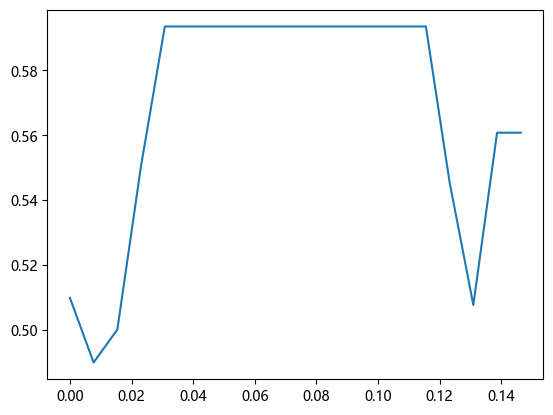

In [45]:
for i in threshold:
    X_1=SelectFromModel(RFC_,threshold=i).fit_transform(X1,Y)
    once=cross_val_score(RFC_,X_1,Y,cv=5).mean()
    score.append(once)
plt.plot(threshold,score)
plt.show()

In [46]:
X_e=SelectFromModel(RFC_,threshold=0.035).fit_transform(X1,Y)
X_e.shape

(396, 6)

In [47]:
cross_val_score(RFC(n_estimators=100,class_weight='balanced',random_state=0),X_e,Y,cv=5).mean()

np.float64(0.5354113924050633)

特征相关性分析

最优特征数量: 42
被保留的特征掩码:
 [False  True False False False  True False False False False False  True
 False False False  True False False False  True  True False False False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]
被保留的特征名称:
 ['DOMSOIL_2', 'LITHOLOGY_3', 'ISOCSUID_CN 139', 'ISOCSUID_CN 312', 'ISOCSUID_CN 774', 'LANDFORM_SH', '宜黄dem', '曲率', '坡向', '坡度', 'yihuangjiangshui', 'LineDen_shp2', 'LineDen_shp1', 'NEAR_FID', 'NEAR_ANGLE', 'AREA', 'PERIMETER', 'CHINA_PC_', 'CHINA_PC_I', 'SUBCLASS_', 'RINGS_OK', 'RINGS_NOK', 'NEWSUID', 'SLOPE_MED', 'RELIEF_MED', 'ELEV_MED', 'SMU_MOD', 'PRID', 'SQKM', 'INDEX', 'AREA_GEO', 'PERIM_GEO', 'PART_COUNT', 'PNT_COUNT', 'EXT_MIN_X', 'EXT_MIN_Y', 'EXT_MAX_X', 'EXT_MAX_Y', 'CHINA_PC1', 'CHINA_PC_I_1', 'SUBCLASS1', 'EucDist_yanx1']
特征排名（数值越小越重要）:
 [17  1 18 19 13  1 16 12  7 14 15  1 11  5  

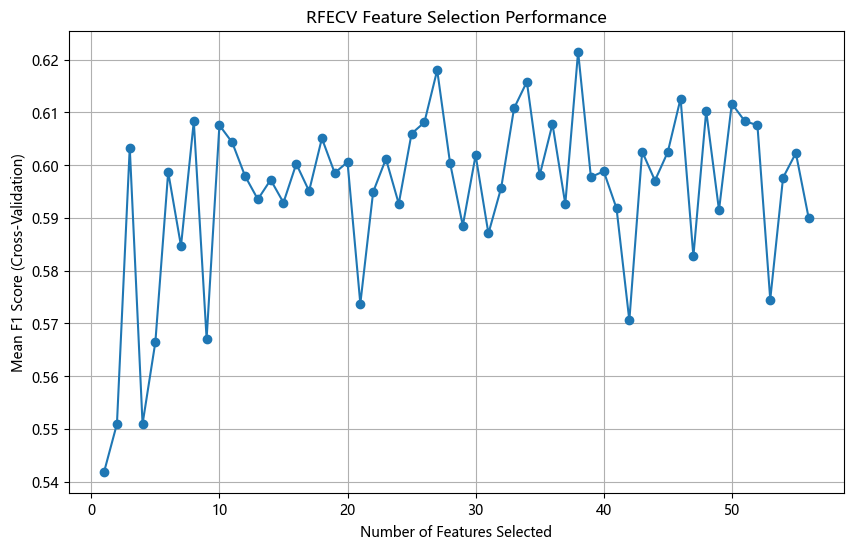

交叉验证F1分数均值: 0.4196
交叉验证F1分数标准差: 0.037


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# ------------------------------------------------
# 步骤1：准备数据（假设X和Y已定义）
# ------------------------------------------------
# X: 特征矩阵，形状为(n_samples, n_features)
# Y: 目标变量（0或1），形状为(n_samples,)
# 例如：X = df.drop(['landslide'], axis=1), Y = df['landslide']

# 确保特征名称可读（可选）
feature_names = X1.columns.tolist()  # 假设X是DataFrame

# ------------------------------------------------
# 步骤2：创建RFECV选择器
# ------------------------------------------------
# 定义基模型（建议调参后的模型，避免过简单）
estimator = RandomForestClassifier(
    n_estimators=131,  # 增加树的数量以提高稳定性
    max_depth=3,
    min_samples_split=10,
    class_weight='balanced',  # 处理类别不平衡
    random_state=42
)

# 创建RFECV对象
selector = RFECV(
    estimator=estimator,
    step=1,           # 每次迭代删除1个特征
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),  # 分层交叉验证
    scoring='f1',     # 使用F1分数（滑坡预测关注正类）
    min_features_to_select=10,  # 至少保留5个特征
    n_jobs=-1         # 使用全部CPU核心加速
)

# ------------------------------------------------
# 步骤3：训练选择器并获取结果
# ------------------------------------------------
selector.fit(X1, Y)  # 输入特征矩阵和目标变量

# ------------------------------------------------
# 步骤4：分析输出结果
# ------------------------------------------------
# 获取最优特征数量
optimal_num_features = selector.n_features_
print(f"最优特征数量: {optimal_num_features}")

# 获取被保留的特征布尔掩码
selected_mask = selector.support_
print("被保留的特征掩码:\n", selected_mask)

# 获取被保留的特征名称（如果X是DataFrame）
selected_features = X1.columns[selected_mask].tolist()
print("被保留的特征名称:\n", selected_features)

# 获取特征排名（1表示最重要，越大越不重要）
feature_ranking = selector.ranking_
print("特征排名（数值越小越重要）:\n", feature_ranking)

# 获取交叉验证得分随特征数量的变化
cv_scores = selector.cv_results_['mean_test_score']

# ------------------------------------------------
# 步骤5：可视化特征选择过程
# ------------------------------------------------
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o')
plt.xlabel("Number of Features Selected")
plt.ylabel("Mean F1 Score (Cross-Validation)")
plt.title("RFECV Feature Selection Performance")
plt.grid(True)
plt.show()

# ------------------------------------------------
# 步骤6：生成最终筛选后的数据集
# ------------------------------------------------
X_selected = selector.transform(X1)  # 输出为NumPy数组
# 转换为DataFrame（可选）
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)

# ------------------------------------------------
# 步骤7：验证筛选后特征的效果
# ------------------------------------------------
from sklearn.model_selection import cross_val_score

# 使用筛选后的特征重新训练模型
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
scores = cross_val_score(model, X_selected, Y, cv=5, scoring='f1')

print("交叉验证F1分数均值:", np.mean(scores).round(4))
print("交叉验证F1分数标准差:", np.std(scores).round(4))

In [49]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score

# 使用调参后的随机森林
RFC_optimized = RandomForestClassifier(
    n_estimators=131,
    max_depth=3,
    min_samples_split=10,
    class_weight='balanced',
    random_state=42
)

# 动态选择阈值
thresholds = np.linspace(0.01,0.1,50)
#thresholds = np.linspace(0, RFC_optimized.fit(X1, Y).feature_importances_.max(), 50)
best_score = 0
best_threshold = 0

for thresh in thresholds:
    selector = SelectFromModel(RFC_optimized, threshold=thresh)
    X_selected = selector.fit_transform(X1, Y)
    if X_selected.shape[1] == 0:  # 避免空特征
        continue
    score = cross_val_score(RFC_optimized, X_selected, Y, cv=5, scoring='f1').mean()
    if score > best_score:
        best_score = score
        best_threshold = thresh

print(f"Best Threshold: {best_threshold:.4f}, F1: {best_score:.4f}")

Best Threshold: 0.0927, F1: 0.5820


In [50]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X1,Y,test_size=0.3)
rfc=RandomForestClassifier(n_estimators=131,
    max_depth=3,
    min_samples_split=10,
    class_weight='balanced',
    random_state=42)
rfc=rfc.fit(Xtrain,Ytrain)
score_r=rfc.score(Xtest,Ytest)

In [51]:
score_r

0.5126050420168067

In [ ]:
import matplotlib.pyplot as plt
test=[]
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
for i in range(10):
    clf=tree.DecisionTreeClassifier(max_depth=i+1
                                    ,criterion="entropy"
                                    ,splitter="random"
                                    ,random_state=36
                                    ,min_samples_leaf=18
                                    ,min_samples_split=10
                                    ,max_features=10
                                   )
    clf=clf.fit(Xtrain,Ytrain)
    score=clf.score(Xtest,Ytest)
    test.append(score)

plt.plot(range(1,11),test,color='r',label="max_depth")
plt.legend()
plt.show()

0.493076923076923 61


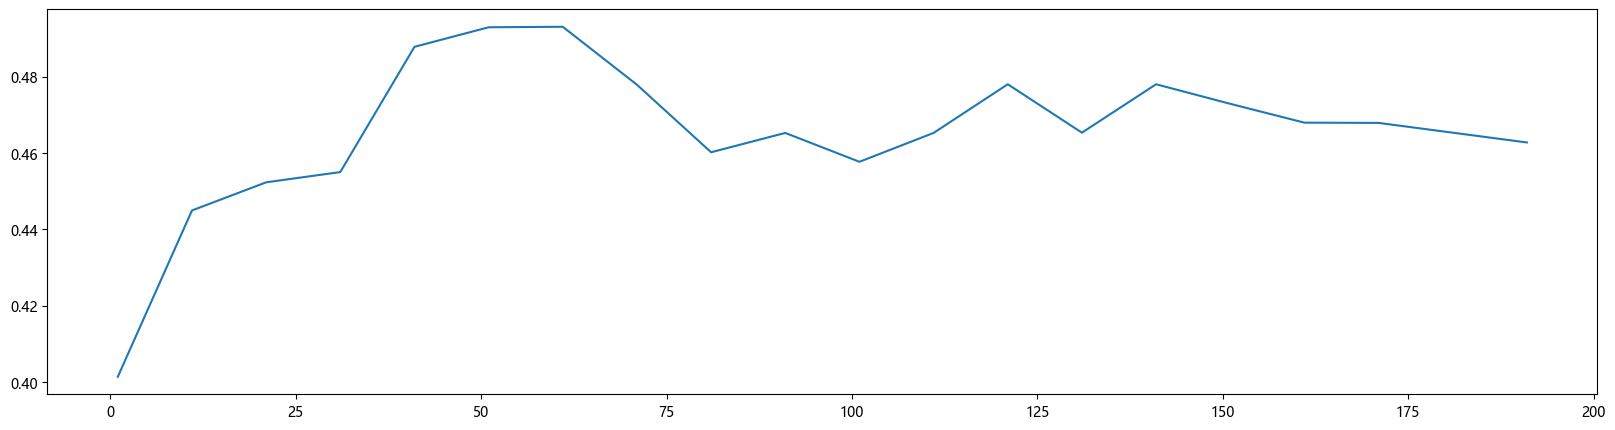

In [291]:
#训练50次随机森林，绘制效果图
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
scorel=[]
for i in range(0,200,10):
    rfc=RandomForestClassifier(n_estimators=i+1,n_jobs=-1,
                               max_depth=5,
                               random_state=42,
                               class_weight='balanced',
                               criterion="entropy",
                               min_samples_leaf=18,
                               min_samples_split=10,
                               max_features=10)
    score=cross_val_score(rfc,X1,Y,cv=10).mean()
    scorel.append(score)

print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

In [293]:
import numpy as np
gini_threholds=np.linspace(0,0.5,50)#0到0.5之间随机取50个有序排列的数 (gini范围)
#entropy_threholds=np.linspace(0,1,50)   #entropy范围



from sklearn.model_selection import GridSearchCV
#参数与 参数可能的取值范围
parameters={"criterion":("gini","entropy"),
            "splitter":("random","best"),
            "max_depth":[*range(1,10)],
            "min_samples_leaf":[*range(1,50,5)],
            "n_estimators":[*range(1,150,5)],
            "min_impurity_decrease":[*np.linspace(0,0.5,10)]#这里先改成20
           }
#网格搜索
clf=DecisionTreeClassifier(random_state=30)
GS=GridSearchCV(clf,parameters,cv=10)
GS=GS.fit(Xtrain,Ytrain)

ValueError: Invalid parameter 'n_estimators' for estimator DecisionTreeClassifier(max_depth=1, min_impurity_decrease=np.float64(0.0),
                       random_state=30). Valid parameters are: ['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'random_state', 'splitter'].